In [1]:
#importing Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3


#importing CSV data file
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_c4e868c5894b4e2dbf342c0402d7bba3 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='OhWH0qcH0vzT5ous8bb8ivqXaBccNvK7PNWqR2jolu9E',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_c4e868c5894b4e2dbf342c0402d7bba3.get_object(Bucket='geoiq-donotdelete-pr-azxv93y4fo9eek',Key='singapore-residents-by-age-group-ethnic-group-and-sex-end-june-annual.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
#storing csv in the data Frame
df = pd.read_csv(body)
df.head()


,year,level_1,level_2,value
0,1957,Total Residents,0 - 4 Years,264727
1,1957,Total Residents,5 - 9 Years,218097
2,1957,Total Residents,10 - 14 Years,136280
3,1957,Total Residents,15 - 19 Years,135679
4,1957,Total Residents,20 - 24 Years,119266


In [2]:
#cleaning data Removing 'NA' from value column
p=df.loc[df.value=='na'].index
for i in p:
    df.drop(index=i,axis=0,inplace=True)

In [3]:
#converting value from string to integer
df['value']=df['value'].astype(int)

In [4]:
#creating table for total ethnic growth calculation
table = pd.pivot_table(df, 
                         index=["level_1"], 
                         columns=["year"], 
                         values=['value'],
                         aggfunc=[np.sum],
                         fill_value=0
                        )
eth=['Total Residents', 'Total Male Residents',
       'Total Female Residents',  'Total Male Malays',
       'Total Female Malays',  'Total Male Chinese',
       'Total Female Chinese',  'Total Male Indians',
       'Total Female Indians', 
       'Other Ethnic Groups (Males)', 'Other Ethnic Groups (Females)']
for i in eth:
    table.drop(i,axis=0,inplace=True)

In [5]:
table

sum                                      \
                               value                                       
year                            1957     1958     1959     1960     1961   
level_1                                                                    
Other Ethnic Groups (Total)    35976    30000    30800    30300    30300   
Total Chinese                1137408  1178100  1235500  1284000  1328500   
Total Indians                 125912   132400   133000   134400   136900   
Total Malays                  202907   212000   223600   235200   245500   

                                                                          ...  \
                                                                          ...   
year                            1962     1963     1964     1965     1966  ...   
level_1                                                                   ...   
Other Ethnic Groups (Total)    31000    32200    31800    31000    32900  ...   
Total Chinese                1368200  1406800  1444700  1480400  1517800  ...   
Total Indians                 138600   139000   140100   142600   143500  ...   
Total Malays                  253800   260800   270700   280800   291600  ...   

                                                                          \
                                                                           
year                            2009     2010     2011     2012     2013   
level_1                                                                    
Other Ethnic Groups (Total)   129853   136038   136162   137197   138801   
Total Chinese                3381633  3436410  3484023  3546288  3607949   
Total Indians                 389488   393420   396169   400856   404343   
Total Malays                  568310   574454   579234   585268   591844   

                                                                          
                                                                          
year                            2014     2015     2016     2017     2018  
level_1                                                                   
Other Ethnic Groups (Total)   139682   140182   141538   142749   144270  
Total Chinese                3675734  3746225  3817895  3897313  3975586  
Total Indians                 408346   413513   418233   423433   428314  
Total Malays                  599863   607882   616566   626221   636807  

[4 rows x 62 columns]

In [6]:
#Calculating Average Growth rate of the various ethnic Groups
avg=[]
y=2018-1957
i=0
while i < len(table.index):
    initial=table.iloc[i,0]
    final=table.iloc[i,-1]
    temp=(((final/initial)**(1/y))-1)*100
    avg.append(temp)
    i=i+1
avg

[2.30289427455721, 2.072696552850406, 2.0272812169889187, 1.8926365248142396]

In [7]:
#creating a table for calculations including only "Total Residents"
tr = pd.pivot_table(df, 
                         index=["level_1"], 
                         columns=["year"], 
                         values=['value'],
                         aggfunc=[np.sum],
                         fill_value=0
                        )
eth=['Total Male Residents',
       'Total Female Residents',  'Total Male Malays',
       'Total Female Malays',  'Total Male Chinese',
       'Total Female Chinese',  'Total Male Indians',
       'Total Female Indians', 
       'Other Ethnic Groups (Males)', 'Other Ethnic Groups (Females)','Other Ethnic Groups (Total)','Total Chinese','Total Indians','Total Malays']
for i in eth:
    tr.drop(i,axis=0,inplace=True)

In [8]:
#converting the type of years to String 
A=[1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
for i in A:
    i=str(i)

In [9]:
np.matrix(table.values)

matrix([[  35976,   30000,   30800,   30300,   30300,   31000,   32200,
           31800,   31000,   32900,   35800,   37000,   37900,   25331,
           40600,   41900,   43100,   44700,   45900,   47400,   48700,
           50100,   51500,   25049,   25072,   25798,   26617,   27445,
           28326,   29039,   29691,   30413,   31168,   34245,   36110,
           37963,   39821,   41681,   43208,   44862,   46975,   49333,
           51754,   54278,   57395,   61930,   61969,   67503,   77320,
           89034,  101049,  111690,  129853,  136038,  136162,  137197,
          138801,  139682,  140182,  141538,  142749,  144270],
        [1137408, 1178100, 1235500, 1284000, 1328500, 1368200, 1406800,
         1444700, 1480400, 1517800, 1550200, 1580300, 1606300, 1656878,
         1675500, 1712400, 1749400, 1783900, 1813400, 1842600, 1873300,
         1899800, 1927200, 1979295, 1980294, 2018487, 2055184, 2089177,
         2124819, 2157661, 2190341, 2230979, 2275199, 2428939, 2482802,


In [10]:
#creating proportion table 
table_1 = np.matrix(table.values)

column_labels = A
idx_labels = ['Other Ethnic Groups (Total)', 'Total Chinese', 'Total Indians', 'Total Malays']

df1 = pd.DataFrame(table_1)
df1.columns = column_labels
df1.index = idx_labels
df1.index.name = 'Proportion'

# Create percentage table
df_percentage = np.round(df1*100/tr.iloc[-1, -1], 1)

df_percentage.insert(62,'Average Growth Rate',avg,True)
df_percentage

,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Average Growth Rate
Proportion,,,,,,,,,,,,,,,,,,,,,
Other Ethnic Groups (Total),0.7,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,...,2.6,2.6,2.6,2.7,2.7,2.7,2.7,2.8,2.8,2.302894
Total Chinese,21.9,22.7,23.8,24.8,25.6,26.4,27.1,27.9,28.6,29.3,...,66.3,67.2,68.4,69.6,70.9,72.3,73.6,75.2,76.7,2.072697
Total Indians,2.4,2.6,2.6,2.6,2.6,2.7,2.7,2.7,2.8,2.8,...,7.6,7.6,7.7,7.8,7.9,8.0,8.1,8.2,8.3,2.027281
Total Malays,3.9,4.1,4.3,4.5,4.7,4.9,5.0,5.2,5.4,5.6,...,11.1,11.2,11.3,11.4,11.6,11.7,11.9,12.1,12.3,1.892637


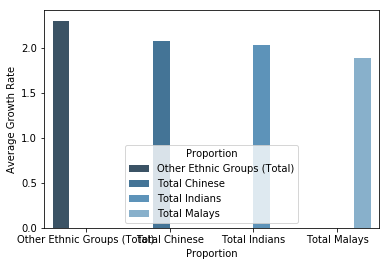

In [11]:
sns.barplot(x=df_percentage.index, y="Average Growth Rate", data=df_percentage,hue=df_percentage.index,palette="Blues_d")

In [12]:
#Finding %change per year
df1pc=df1.pct_change(axis='columns')
df1pc

,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Proportion,,,,,,,,,,,,,,,,,,,,,
Other Ethnic Groups (Total),NaN,-0.166111,0.026667,-0.016234,0.000000,0.023102,0.038710,-0.012422,-0.025157,0.061290,...,0.162620,0.047631,0.000912,0.007601,0.011691,0.006347,0.003580,0.009673,0.008556,0.010655
Total Chinese,NaN,0.035776,0.048723,0.039255,0.034657,0.029883,0.028212,0.026941,0.024711,0.025263,...,0.024944,0.016198,0.013855,0.017872,0.017387,0.018788,0.019177,0.019131,0.020802,0.020084
Total Indians,NaN,0.051528,0.004532,0.010526,0.018601,0.012418,0.002886,0.007914,0.017844,0.006311,...,0.060755,0.010095,0.006987,0.011831,0.008699,0.009900,0.012653,0.011414,0.012433,0.011527
Total Malays,NaN,0.044814,0.054717,0.051878,0.043793,0.033809,0.027581,0.037960,0.037311,0.038462,...,0.014035,0.010811,0.008321,0.010417,0.011236,0.013549,0.013368,0.014286,0.015659,0.016905


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a8c14ed68>,
      dtype=object)

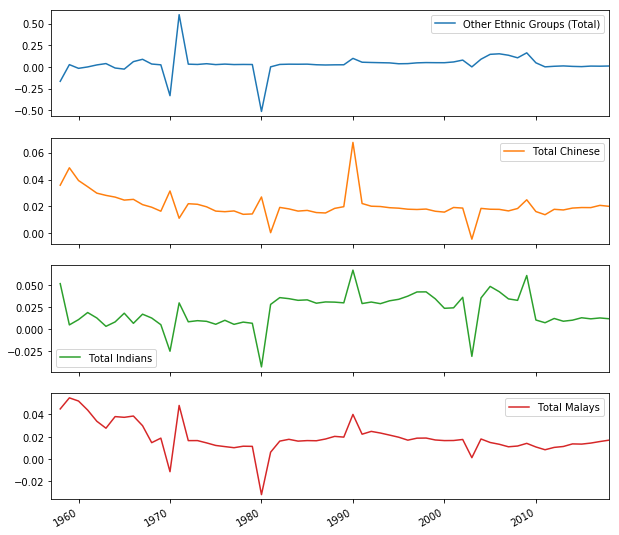

In [13]:
df1pc.T.plot.line(subplots=True,figsize=(10,10))

In [14]:
#creating Table for calculations based on age groups
age = pd.pivot_table(df, 
                         index=["level_2"], 
                         columns=["year"], 
                         values=['value'],
                         aggfunc=[np.sum],
                         fill_value=0,
                         margins=False,
                         margins_name='Total'
                        )
#Calculating column wise sum 
Total=age.sum(axis=0)
Total.T
#t=pd.DataFrame(Total)
#age.append(Total.T).reset_index()
age

sum                                               \
                   value                                                
year                1957     1958     1959     1960     1961     1962   
level_2                                                                 
0  -  4 Years    1058908  1111200  1155200  1188000  1214800  1224400   
10 - 14 Years     545120   628400   702800   801200   869600   895600   
15 - 19 Years     542716   537200   526000   498800   499600   560000   
20 - 24 Years     477064   499600   532400   558000   570000   557600   
25 - 29 Years     446904   458800   460400   464800   478400   488400   
30 - 34 Years     359700   380400   408400   426400   449200   452000   
35 - 39 Years     330836   337200   340800   345600   344800   362400   
40 - 44 Years     304868   310000   316400   322000   332400   329600   
45 - 49 Years     266864   277200   289600   297600   297200   302000   
5  -  9 Years     872388   918400   964000  1001200  1035600  1066800   
50 - 54 Years     207176   216800   229200   238400   250400   262800   
55 - 59 Years     149824   161600   171600   178800   183600   198400   
60 - 64 Years      97104   103600   109200   114800   128800   135200   
65 - 69 Years      61596    68400    71200    73600    76000    81200   
65 Years & Over   124244   134800   142800   150000   155200   165600   
70 - 74 Years      35096        0        0        0        0        0   
70 Years & Over    62648    66400    71600    76400    79200    84400   
75 - 79 Years      16900        0        0        0        0        0   
75 Years & Over    27552        0        0        0        0        0   
80 - 84 Years       7144        0        0        0        0        0   
80 Years & Over    10652        0        0        0        0        0   
85 Years & Over     3508        0        0        0        0        0   

                                                     ...                    \
                                                     ...                     
year                1963     1964     1965     1966  ...     2009     2010   
level_2                                              ...                     
0  -  4 Years    1212000  1199600  1174000  1158400  ...   791152   777728   
10 - 14 Years     928000   960800   994000  1029200  ...   994512   977208   
15 - 19 Years     636000   703200   794400   860800  ...  1051100  1055000   
20 - 24 Years     540800   522000   495200   492800  ...   967012   988760   
25 - 29 Years     500000   528000   551600   560000  ...  1097232  1090556   
30 - 34 Years     458400   452400   458800   469600  ...  1188960  1194748   
35 - 39 Years     375200   400800   416000   436800  ...  1269244  1280096   
40 - 44 Years     332000   330800   337600   340000  ...  1251932  1237764   
45 - 49 Years     303600   308400   308800   320800  ...  1289988  1293836   
5  -  9 Years    1104000  1136000  1164400  1190400  ...   885740   862700   
50 - 54 Years     268400   274000   282800   282400  ...  1189532  1212176   
55 - 59 Years     204000   214800   219600   226400  ...   959788   994784   
60 - 64 Years     142400   152800   158800   164400  ...   678784   767980   
65 - 69 Years      86400    89200    96000   102400  ...   465032   446044   
65 Years & Over   175200   182800   191600   205600  ...  1320528  1353548   
70 - 74 Years          0        0        0        0  ...   349712   370472   
70 Years & Over    88800    93600    95600   103200  ...   855496   907504   
75 - 79 Years          0        0        0        0  ...   245960   260712   
75 Years & Over        0        0        0        0  ...   505784   537032   
80 - 84 Years          0        0        0        0  ...   148572   159356   
80 Years & Over        0        0        0        0  ...   259824   276320   
85 Years & Over        0        0        0        0  ...   111252   116964   

                                                                       \
                    

In [15]:
#converting to Data Frame
T=np.matrix(Total)
T.shape
Tot=pd.DataFrame(T)
Tot.rename(index={0: 'Total'},inplace=True)

In [16]:
Tot.head()

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
Total,6008812,6210000,6491600,6735600,6964800,7166400,7355200,7549200,7739200,7943200,...,17877136,18161288,18382352,18678436,18971748,19294500,19631208,19976928,20358864,20739908


In [17]:
age.index
idx=['0  -  4 Years', '10 - 14 Years', '15 - 19 Years', '20 - 24 Years',
       '25 - 29 Years', '30 - 34 Years', '35 - 39 Years', '40 - 44 Years',
       '45 - 49 Years', '5  -  9 Years', '50 - 54 Years', '55 - 59 Years',
       '60 - 64 Years', '65 - 69 Years', '65 Years & Over', '70 - 74 Years',
       '70 Years & Over', '75 - 79 Years', '75 Years & Over', '80 - 84 Years',
       '80 Years & Over', '85 Years & Over']

In [18]:
#Calculating Average Growth rate of the various age groups
avg=[]
y=2018-1957
i=0
while i < len(age.index):
    initial=age.iloc[i,0]
    final=age.iloc[i,-1]
    temp=(((final/initial)**(1/y))-1)*100
    avg.append(temp)
    i=i+1
avg

[-0.5810810442230419,
 0.6838590005160183,
 0.84377172339829,
 1.2568968826288218,
 1.5852866549884714,
 1.8877451494358821,
 2.1553212314678216,
 2.2918658786706514,
 2.5384522694656075,
 -0.1495658909066111,
 2.9710741530563523,
 3.494326036844675,
 4.038713341846956,
 4.393378763171718,
 4.817451641294346,
 4.589957097355235,
 5.153202277305269,
 5.204846591133738,
 5.679302057619351,
 5.844545681481206,
 6.239813503358116,
 6.845091623718758]

In [19]:
#creating table proportions
age_table = np.matrix(age.values)

column_labels = A
idx_labels = idx

dfage = pd.DataFrame(age_table)
dfage.columns = column_labels
dfage.index = idx_labels
dfage.index.name = 'Proportion'


#Create percentage table
age_percentage = np.round(dfage*100/Tot.iloc[-1, -1], 1)
age_percentage.insert(62,'Average Growth Rate',avg,True)
age_percentage


,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Average Growth Rate
Proportion,,,,,,,,,,,,,,,,,,,,,
0 - 4 Years,5.1,5.4,5.6,5.7,5.9,5.9,5.8,5.8,5.7,5.6,...,3.7,3.6,3.6,3.5,3.5,3.5,3.6,3.6,3.6,-0.581081
10 - 14 Years,2.6,3.0,3.4,3.9,4.2,4.3,4.5,4.6,4.8,5.0,...,4.7,4.6,4.5,4.4,4.3,4.1,4.0,4.0,4.0,0.683859
15 - 19 Years,2.6,2.6,2.5,2.4,2.4,2.7,3.1,3.4,3.8,4.2,...,5.1,5.0,5.0,4.9,4.8,4.7,4.6,4.5,4.4,0.843772
20 - 24 Years,2.3,2.4,2.6,2.7,2.7,2.7,2.6,2.5,2.4,2.4,...,4.8,4.9,5.1,5.1,5.1,5.1,5.0,5.0,4.9,1.256897
25 - 29 Years,2.2,2.2,2.2,2.2,2.3,2.4,2.4,2.5,2.7,2.7,...,5.3,5.1,4.9,4.9,5.1,5.2,5.4,5.6,5.6,1.585287
30 - 34 Years,1.7,1.8,2.0,2.1,2.2,2.2,2.2,2.2,2.2,2.3,...,5.8,5.7,5.7,5.7,5.6,5.6,5.5,5.4,5.4,1.887745
35 - 39 Years,1.6,1.6,1.6,1.7,1.7,1.7,1.8,1.9,2.0,2.1,...,6.2,6.1,6.1,5.9,5.8,5.8,5.8,5.8,5.9,2.155321
40 - 44 Years,1.5,1.5,1.5,1.6,1.6,1.6,1.6,1.6,1.6,1.6,...,6.0,5.9,6.0,6.0,6.1,6.1,6.0,6.0,5.9,2.291866
45 - 49 Years,1.3,1.3,1.4,1.4,1.4,1.5,1.5,1.5,1.5,1.5,...,6.2,6.2,6.2,6.1,6.0,5.9,5.8,5.9,5.9,2.538452


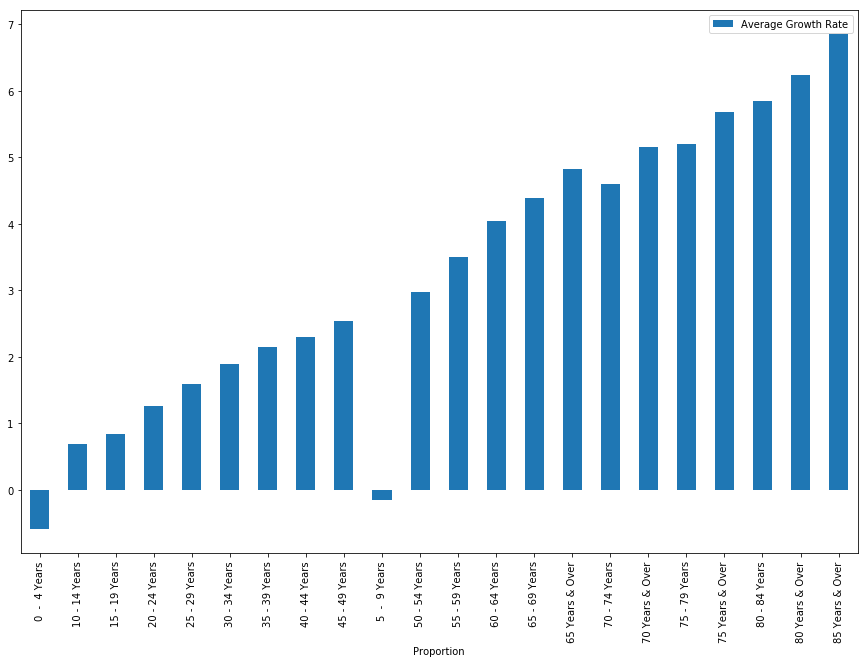

In [20]:
age_percentage.plot.bar(y="Average Growth Rate",figsize=(15,10))

In [21]:
#percent change per year for various age groups
dfagepc=dfage.pct_change(axis='columns')
dfagepc

,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Proportion,,,,,,,,,,,,,,,,,,,,,
0 - 4 Years,NaN,0.049383,0.039597,0.028393,0.022559,0.007903,-0.010127,-0.010231,-0.021340,-0.013288,...,0.020109,-0.016968,-0.031800,-0.008372,-0.018096,-0.010508,0.012163,0.019529,0.002634,-0.011324
10 - 14 Years,NaN,0.152774,0.118396,0.140011,0.085372,0.029899,0.036177,0.035345,0.034555,0.035412,...,-0.020363,-0.017399,-0.015415,-0.030000,-0.030327,-0.024080,-0.029022,-0.032152,-0.005986,0.001343
15 - 19 Years,NaN,-0.010164,-0.020849,-0.051711,0.001604,0.120897,0.135714,0.105660,0.129693,0.083585,...,-0.000308,0.003710,-0.011420,-0.007199,-0.014660,-0.030302,-0.017931,-0.012890,-0.028352,-0.027698
20 - 24 Years,NaN,0.047239,0.065653,0.048084,0.021505,-0.021754,-0.030129,-0.034763,-0.051341,-0.004847,...,0.072622,0.022490,0.031874,0.036998,0.009009,-0.011132,0.000792,-0.012392,-0.006831,-0.013726
25 - 29 Years,NaN,0.026619,0.003487,0.009557,0.029260,0.020903,0.023751,0.056000,0.044697,0.015228,...,0.042544,-0.006084,-0.036800,-0.030555,0.004058,0.039293,0.020218,0.033052,0.036466,0.004938
30 - 34 Years,NaN,0.057548,0.073607,0.044074,0.053471,0.006233,0.014159,-0.013089,0.014147,0.023540,...,0.025613,0.004868,-0.003790,-0.007256,0.004990,-0.015438,-0.005707,-0.017463,-0.021727,0.007364
35 - 39 Years,NaN,0.019236,0.010676,0.014085,-0.002315,0.051044,0.035320,0.068230,0.037924,0.050000,...,0.032769,0.008550,-0.012071,-0.006930,-0.026968,-0.011371,-0.003185,0.003092,-0.003450,0.009184
40 - 44 Years,NaN,0.016834,0.020645,0.017699,0.032298,-0.008424,0.007282,-0.003614,0.020556,0.007109,...,-0.013801,-0.011317,-0.009136,0.007204,0.012169,0.011012,0.002316,-0.010450,-0.006256,-0.025183
45 - 49 Years,NaN,0.038731,0.044733,0.027624,-0.001344,0.016151,0.005298,0.015810,0.001297,0.038860,...,0.013893,0.002983,0.001645,-0.009463,-0.014299,-0.024667,-0.016595,-0.007350,0.007550,0.014437


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a6c629f28>,
      dtype=object)

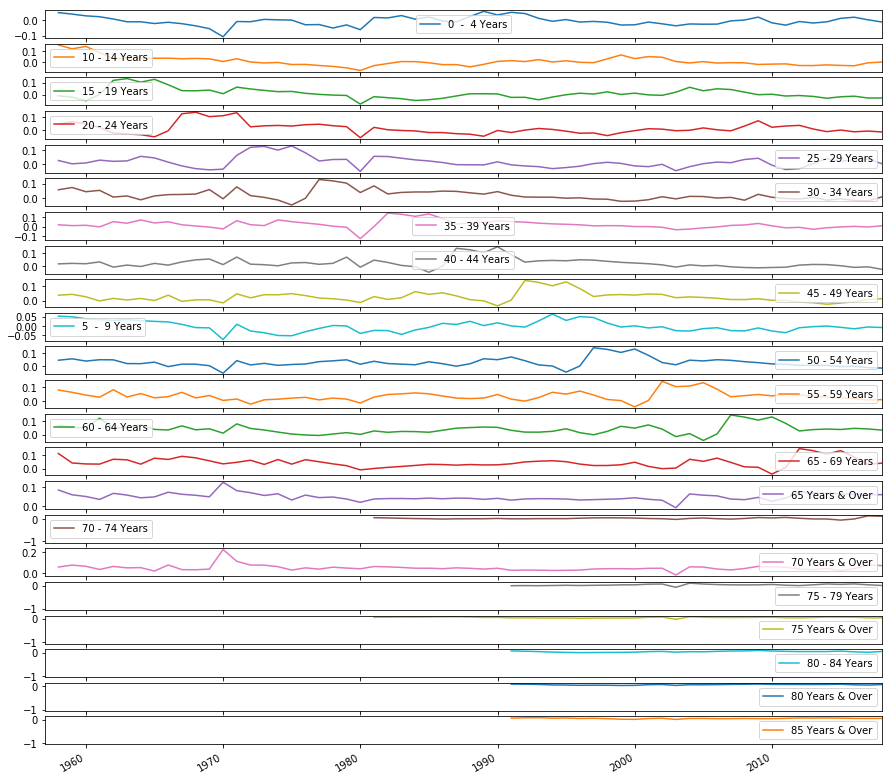

In [22]:
dfagepc.T.plot.line(subplots=True,figsize=(15,15))

In [23]:
#calculation based on gender
df.level_1.unique()

array(['Total Residents', 'Total Male Residents',
       'Total Female Residents', 'Total Malays', 'Total Male Malays',
       'Total Female Malays', 'Total Chinese', 'Total Male Chinese',
       'Total Female Chinese', 'Total Indians', 'Total Male Indians',
       'Total Female Indians', 'Other Ethnic Groups (Total)',
       'Other Ethnic Groups (Males)', 'Other Ethnic Groups (Females)'],
      dtype=object)

In [24]:
#Female Gender Analysis
Female = pd.pivot_table(df, 
                         index=["level_1"], 
                         columns=["year"], 
                         values=['value'],
                         aggfunc=[np.sum],
                         fill_value=0
                        )
eth=['Total Residents', 'Total Male Residents','Total Female Residents',
        'Total Malays', 'Total Male Malays',
        'Total Chinese', 'Total Male Chinese',
        'Total Indians', 'Total Male Indians',
        'Other Ethnic Groups (Total)',
       'Other Ethnic Groups (Males)', ]
for i in eth:
    Female.drop(i,axis=0,inplace=True)

In [25]:
Female.index

Index(['Other Ethnic Groups (Females)', 'Total Female Chinese',
       'Total Female Indians', 'Total Female Malays'],
      dtype='object', name='level_1')

In [26]:
avg=[]
y=2018-1957
i=0
while i < len(Female.index):
    initial=Female.iloc[i,0]
    final=Female.iloc[i,-1]
    temp=(((final/initial)**(1/y))-1)*100
    avg.append(temp)
    i=i+1
avg

[2.467758690969468, 2.169253234400359, 2.835867646192347, 2.0095335792804203]

In [27]:
#creating a table for calculations including only "Total Female Residents"
Female_tr = pd.pivot_table(df, 
                         index=["level_1"], 
                         columns=["year"], 
                         values=['value'],
                         aggfunc=[np.sum],
                         fill_value=0
                        )
eth=['Total Residents','Total Male Residents',  'Total Male Malays',
       'Total Female Malays',  'Total Male Chinese',
       'Total Female Chinese',  'Total Male Indians',
       'Total Female Indians', 
       'Other Ethnic Groups (Males)', 'Other Ethnic Groups (Females)','Other Ethnic Groups (Total)','Total Chinese','Total Indians','Total Malays']
for i in eth:
    Female_tr.drop(i,axis=0,inplace=True)
Female_tr

sum                                          \
                         value                                           
year                      1957    1958    1959    1960    1961    1962   
level_1                                                                  
Total Female Residents  718610  741700  777800  809500  839300  866100   

                                                        ...                    \
                                                        ...                     
year                      1963    1964    1965    1966  ...     2009     2010   
level_1                                                 ...                     
Total Female Residents  891600  917400  941700  968800  ...  2313345  2354836   

                                                                              \
                                                                               
year                       2011     2012     2013     2014     2015     2016   
level_1                                                                        
Total Female Residents  2386436  2427930  2468114  2513015  2558805  2606695   

                                          
                                          
year                       2017     2018  
level_1                                   
Total Female Residents  2658986  2710323  

[1 rows x 62 columns]

In [28]:
#creating proportion table for calcuation based on total female residents
Female_1 = np.matrix(Female.values)

column_labels = A
idx_labels = ['Other Ethnic Groups (Females)', 'Total Female Chinese','Total Female Indians', 'Total Female Malays']

dffemale1 = pd.DataFrame(Female_1)
dffemale1.columns = column_labels
dffemale1.index = idx_labels
dffemale1.index.name = 'Proportion'

# Create percentage table
female_percentage = np.round(dffemale1*100/Female_tr.iloc[-1, -1], 1)

female_percentage.insert(62,'Average Growth Rate',avg,True)
female_percentage

,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Average Growth Rate
Proportion,,,,,,,,,,,,,,,,,,,,,
Other Ethnic Groups (Females),0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,...,2.6,2.6,2.7,2.7,2.7,2.7,2.8,2.8,2.8,2.467759
Total Female Chinese,20.9,21.5,22.6,23.5,24.3,25.0,25.8,26.5,27.1,27.8,...,66.5,67.5,68.7,69.9,71.3,72.7,74.2,75.7,77.3,2.169253
Total Female Indians,1.4,1.6,1.6,1.7,1.7,1.8,1.8,1.9,2.0,2.0,...,7.0,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,2.835868
Total Female Malays,3.6,3.7,3.9,4.2,4.4,4.5,4.7,4.9,5.1,5.3,...,10.8,10.9,11.0,11.1,11.3,11.5,11.6,11.8,12.0,2.009534


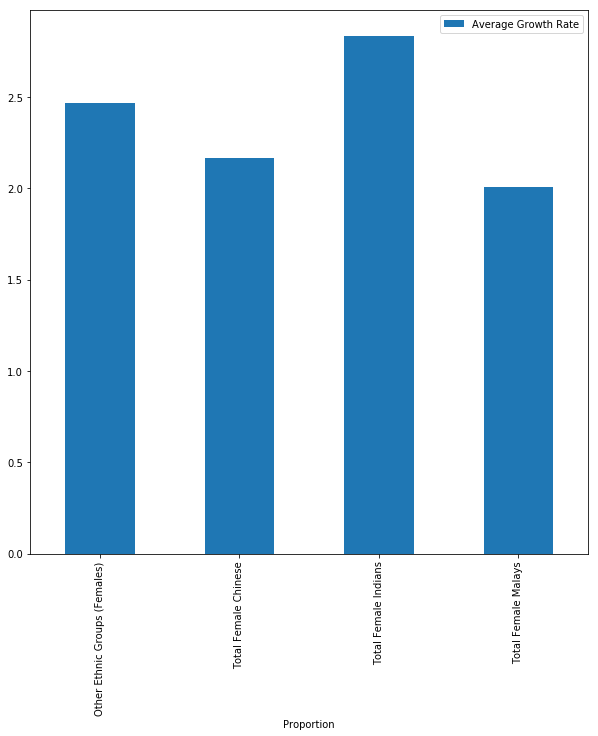

In [29]:
female_percentage.plot.bar(y="Average Growth Rate",figsize=(10,10))

In [30]:
dffemale1pc=dffemale1.pct_change(axis='columns')
dffemale1pc

,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Proportion,,,,,,,,,,,,,,,,,,,,,
Other Ethnic Groups (Females),NaN,-0.124928,0.019737,-0.012903,0.006536,0.025974,0.050633,-0.018072,-0.036810,0.089172,...,0.169428,0.049126,-0.000770,0.006148,0.010955,0.008523,0.005393,0.015494,0.012957,0.014442
Total Female Chinese,NaN,0.030217,0.049082,0.040242,0.035383,0.031136,0.028134,0.027937,0.025226,0.025014,...,0.026990,0.017673,0.014872,0.018751,0.017828,0.019592,0.019627,0.019766,0.021293,0.020320
Total Female Indians,NaN,0.098246,0.037736,0.034091,0.037363,0.027542,0.028866,0.030060,0.029183,0.030246,...,0.059394,0.017253,0.010670,0.017371,0.012396,0.013555,0.014747,0.015728,0.015664,0.014001
Total Female Malays,NaN,0.045102,0.055227,0.054206,0.048759,0.038884,0.034174,0.040126,0.040091,0.041455,...,0.016910,0.012624,0.009714,0.011665,0.012644,0.014770,0.014688,0.014778,0.016771,0.017444


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a66d24b70>,
      dtype=object)

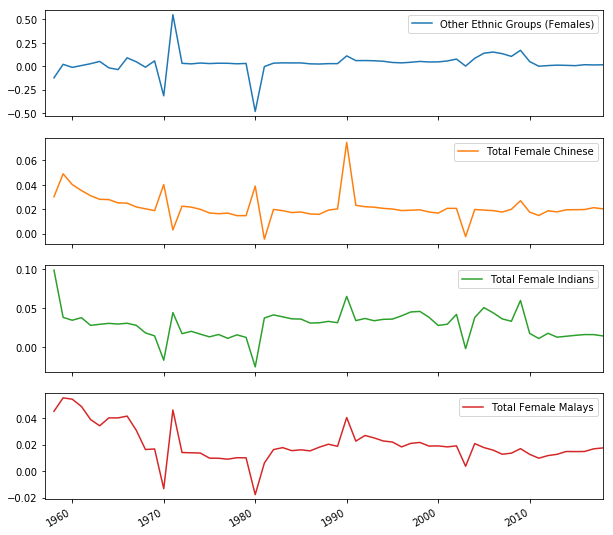

In [31]:
dffemale1pc.T.plot.line(subplots=True,figsize=(10,10))

In [32]:
#calculations based on Total Residents
Female_1 = np.matrix(Female.values)

column_labels = A
idx_labels = ['Other Ethnic Groups (Females)', 'Total Female Chinese','Total Female Indians', 'Total Female Malays']

dffemale2 = pd.DataFrame(Female_1)
dffemale2.columns = column_labels
dffemale2.index = idx_labels
dffemale2.index.name = 'Proportion'

# Create percentage table
female_percentagetr = np.round(dffemale2*100/tr.iloc[-1, -1], 1)
female_percentagetr


,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Proportion,,,,,,,,,,,,,,,,,,,,,
Other Ethnic Groups (Females),0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,...,1.3,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.5,1.5
Total Female Chinese,10.9,11.2,11.8,12.3,12.7,13.1,13.5,13.8,14.2,14.5,...,34.1,34.7,35.3,35.9,36.6,37.3,38.0,38.8,39.6,40.4
Total Female Indians,0.7,0.8,0.8,0.9,0.9,0.9,1.0,1.0,1.0,1.1,...,3.6,3.7,3.7,3.8,3.8,3.9,3.9,4.0,4.0,4.1
Total Female Malays,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.5,2.7,2.8,...,5.6,5.6,5.7,5.8,5.8,5.9,6.0,6.1,6.2,6.3


In [33]:
#calculations for Male  groups
Male = pd.pivot_table(df, 
                         index=["level_1"], 
                         columns=["year"], 
                         values=['value'],
                         aggfunc=[np.sum],
                         fill_value=0
                        )
eth=['Total Residents', 'Total Male Residents',
       'Total Female Residents', 'Total Malays', 
       'Total Female Malays', 'Total Chinese', 
       'Total Female Chinese', 'Total Indians',
       'Total Female Indians', 'Other Ethnic Groups (Total)', 'Other Ethnic Groups (Females)']
for i in eth:
    Male.drop(i,axis=0,inplace=True)
Male

sum                                          \
                              value                                           
year                           1957    1958    1959    1960    1961    1962   
level_1                                                                       
Other Ethnic Groups (Males)   18606   14800   15300   15000   14900   15200   
Total Male Chinese           571799  595400  624200  648100  670100  689300   
Total Male Indians            87305   90000   89000   88900   89700   90100   
Total Male Malays            105883  110600  116600  122400  127200  130900   

                                                             ...           \
                                                             ...            
year                           1963    1964    1965    1966  ...     2009   
level_1                                                      ...            
Other Ethnic Groups (Males)   15600   15500   15300   15800  ...    61742   
Total Male Chinese           708800  727200  744800  763800  ...  1611389   
Total Male Indians            89100   88700   89700   89000  ...   202915   
Total Male Malays            133700  138500  143300  148400  ...   279893   

                                                                          \
                                                                           
year                            2010     2011     2012     2013     2014   
level_1                                                                    
Other Ethnic Groups (Males)    64581    64760    65356    66173    66435   
Total Male Chinese           1634881  1655701  1683683  1712138  1742781   
Total Male Indians            203628   204352   205707   206775   208100   
Total Male Malays             282396   284339   286933   289737   293294   

                                                                 
                                                                 
year                            2015     2016     2017     2018  
level_1                                                          
Other Ethnic Groups (Males)    66540    66755    66997    67424  
Total Male Chinese           1775333  1808047  1844670  1881234  
Total Male Indians            210314   211838   213805   215751  
Total Male Malays             296810   300897   305258   310245  

[4 rows x 62 columns]

In [34]:
Male_tr = pd.pivot_table(df, 
                         index=["level_1"], 
                         columns=["year"], 
                         values=['value'],
                         aggfunc=[np.sum],
                         fill_value=0
                        )
eth=['Total Residents',
       'Total Female Residents', 'Total Malays', 'Total Male Malays',
       'Total Female Malays', 'Total Chinese', 'Total Male Chinese',
       'Total Female Chinese', 'Total Indians', 'Total Male Indians',
       'Total Female Indians', 'Other Ethnic Groups (Total)',
       'Other Ethnic Groups (Males)', 'Other Ethnic Groups (Females)']
for i in eth:
    Male_tr.drop(i,axis=0,inplace=True)
Male_tr

sum                                                  \
                       value                                                   
year                    1957    1958    1959    1960    1961    1962    1963   
level_1                                                                        
Total Male Residents  783593  810800  845100  874400  901900  925500  947200   

                                               ...                             \
                                               ...                              
year                    1964    1965     1966  ...     2009     2010     2011   
level_1                                        ...                              
Total Male Residents  969900  993100  1017000  ...  2155939  2185486  2209152   

                                                                            \
                                                                             
year                     2012     2013     2014     2015     2016     2017   
level_1                                                                      
Total Male Residents  2241679  2274823  2310610  2348997  2387537  2430730   

                               
                               
year                     2018  
level_1                        
Total Male Residents  2474654  

[1 rows x 62 columns]

In [35]:
avg=[]
y=2018-1957
i=0
while i < len(Male.index):
    initial=Male.iloc[i,0]
    final=Male.iloc[i,-1]
    temp=(((final/initial)**(1/y))-1)*100
    avg.append(temp)
    i=i+1
avg

[2.133115961100218, 1.971469787422775, 1.494196142780324, 1.7779611692517294]

In [36]:
#based on Total Male Residents
Male_1 = np.matrix(Male.values)

column_labels = A
idx_labels = ['Other Ethnic Groups (Males)', 'Total Male Chinese','Total Male Indians', 'Total Male Malays']

dfmale1 = pd.DataFrame(Male_1)
dfmale1.columns = column_labels
dfmale1.columns.name='year'
dfmale1.index = idx_labels
dfmale1.index.name = 'Proportion'

# Create percentage table
male_percentage = np.round(dfmale1*100/Male_tr.iloc[-1, -1], 1)

male_percentage.insert(62,'Average Growth Rate',avg,True)
male_percentage

year,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Average Growth Rate
Proportion,,,,,,,,,,,,,,,,,,,,,
Other Ethnic Groups (Males),0.8,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,...,2.6,2.6,2.6,2.7,2.7,2.7,2.7,2.7,2.7,2.133116
Total Male Chinese,23.1,24.1,25.2,26.2,27.1,27.9,28.6,29.4,30.1,30.9,...,66.1,66.9,68.0,69.2,70.4,71.7,73.1,74.5,76.0,1.971470
Total Male Indians,3.5,3.6,3.6,3.6,3.6,3.6,3.6,3.6,3.6,3.6,...,8.2,8.3,8.3,8.4,8.4,8.5,8.6,8.6,8.7,1.494196
Total Male Malays,4.3,4.5,4.7,4.9,5.1,5.3,5.4,5.6,5.8,6.0,...,11.4,11.5,11.6,11.7,11.9,12.0,12.2,12.3,12.5,1.777961


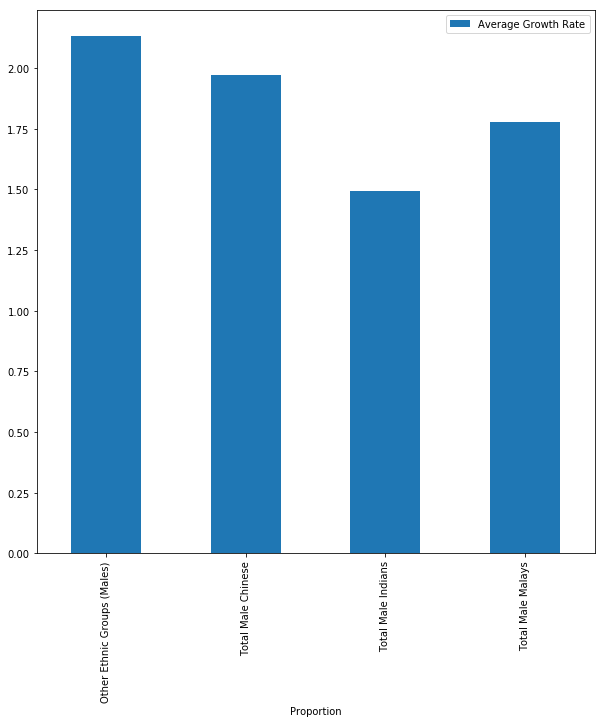

In [37]:
male_percentage.plot.bar(y="Average Growth Rate",figsize=(10,10))

In [38]:
dfmale1pc=dfmale1.pct_change(axis='columns')
dfmale1pc

year,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Proportion,,,,,,,,,,,,,,,,,,,,,
Other Ethnic Groups (Males),NaN,-0.204558,0.033784,-0.019608,-0.006667,0.020134,0.026316,-0.006410,-0.012903,0.032680,...,0.155200,0.045982,0.002772,0.009203,0.012501,0.003959,0.001580,0.003231,0.003625,0.006373
Total Male Chinese,NaN,0.041275,0.048371,0.038289,0.033945,0.028652,0.028290,0.025959,0.024202,0.025510,...,0.022705,0.014579,0.012735,0.016900,0.016900,0.017898,0.018678,0.018427,0.020256,0.019821
Total Male Indians,NaN,0.030869,-0.011111,-0.001124,0.008999,0.004459,-0.011099,-0.004489,0.011274,-0.007804,...,0.062010,0.003514,0.003556,0.006631,0.005192,0.006408,0.010639,0.007246,0.009285,0.009102
Total Male Malays,NaN,0.044549,0.054250,0.049743,0.039216,0.029088,0.021390,0.035901,0.034657,0.035590,...,0.011090,0.008943,0.006880,0.009123,0.009772,0.012277,0.011988,0.013770,0.014493,0.016337


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a66ad01d0>,
      dtype=object)

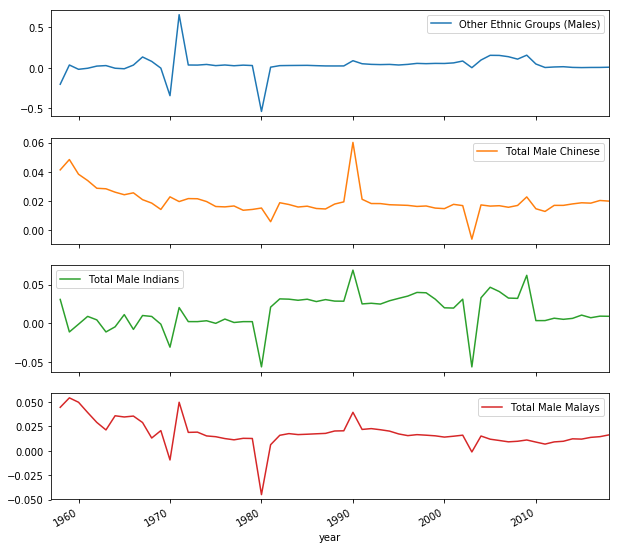

In [39]:
dfmale1pc.T.plot.line(subplots=True,figsize=(10,10))

In [40]:
#based on Total Residents
Male_1 = np.matrix(Male.values)

column_labels = A
idx_labels = ['Other Ethnic Groups (Males)', 'Total Male Chinese','Total Male Indians', 'Total Male Malays']

dfmale2 = pd.DataFrame(Male_1)
dfmale2.columns = column_labels
dfmale2.index = idx_labels
dfmale2.index.name = 'Proportion'

# Create percentage table
male_percentagetr = np.round(dfmale2*100/tr.iloc[-1, -1], 1)

male_percentagetr

,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Proportion,,,,,,,,,,,,,,,,,,,,,
Other Ethnic Groups (Males),0.4,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,...,1.2,1.2,1.2,1.3,1.3,1.3,1.3,1.3,1.3,1.3
Total Male Chinese,11.0,11.5,12.0,12.5,12.9,13.3,13.7,14.0,14.4,14.7,...,31.1,31.5,31.9,32.5,33.0,33.6,34.2,34.9,35.6,36.3
Total Male Indians,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,...,3.9,3.9,3.9,4.0,4.0,4.0,4.1,4.1,4.1,4.2
Total Male Malays,2.0,2.1,2.2,2.4,2.5,2.5,2.6,2.7,2.8,2.9,...,5.4,5.4,5.5,5.5,5.6,5.7,5.7,5.8,5.9,6.0


In [41]:
Trmalefemaledf=pd.concat([female_percentagetr, male_percentagetr])
Trmalefemaledf

,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Proportion,,,,,,,,,,,,,,,,,,,,,
Other Ethnic Groups (Females),0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,...,1.3,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.5,1.5
Total Female Chinese,10.9,11.2,11.8,12.3,12.7,13.1,13.5,13.8,14.2,14.5,...,34.1,34.7,35.3,35.9,36.6,37.3,38.0,38.8,39.6,40.4
Total Female Indians,0.7,0.8,0.8,0.9,0.9,0.9,1.0,1.0,1.0,1.1,...,3.6,3.7,3.7,3.8,3.8,3.9,3.9,4.0,4.0,4.1
Total Female Malays,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.5,2.7,2.8,...,5.6,5.6,5.7,5.8,5.8,5.9,6.0,6.1,6.2,6.3
Other Ethnic Groups (Males),0.4,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,...,1.2,1.2,1.2,1.3,1.3,1.3,1.3,1.3,1.3,1.3
Total Male Chinese,11.0,11.5,12.0,12.5,12.9,13.3,13.7,14.0,14.4,14.7,...,31.1,31.5,31.9,32.5,33.0,33.6,34.2,34.9,35.6,36.3
Total Male Indians,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,...,3.9,3.9,3.9,4.0,4.0,4.0,4.1,4.1,4.1,4.2
Total Male Malays,2.0,2.1,2.2,2.4,2.5,2.5,2.6,2.7,2.8,2.9,...,5.4,5.4,5.5,5.5,5.6,5.7,5.7,5.8,5.9,6.0


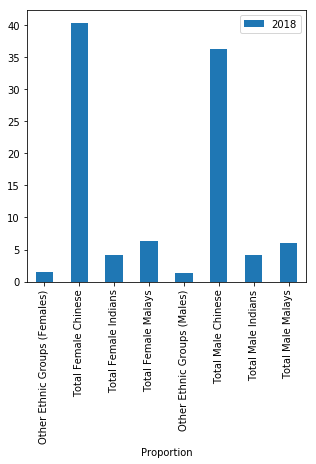

In [42]:
Trmalefemaledf.plot.bar(y=2018,figsize=(5,5))

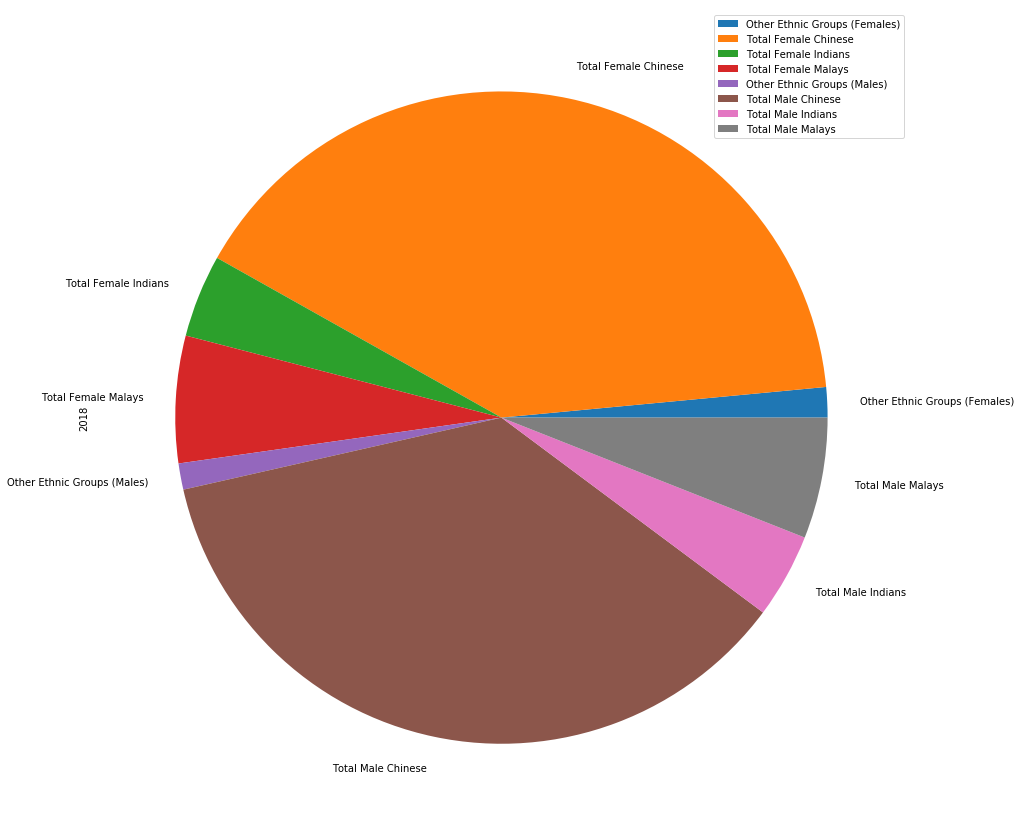

In [43]:
Trmalefemaledf.plot.pie(y=2018,figsize=(15,15))